In [64]:
%load_ext autoreload
%autoreload 2

#%pylab notebook
%matplotlib inline
from pylab import *
from matplotlib import rc;rc('text', usetex=True);rc('font', weight='bold');matplotlib.rcParams['text.latex.preamble'] = [r'\boldmath']
rcParams['figure.dpi'] = 150
rcParams["figure.facecolor"] = 'white'
rc('text.latex',preamble=r'\usepackage{/Users/sraghunathan/.configs/apjfonts}')


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [65]:
import sys, numpy as np, glob
sys.path.append('/Users/sraghunathan/Research/SPTPol/analysis/git/ilc/DRAFT/')
import flatsky, tools, misc

In [66]:
camb_file = 'data/output_planck_r_0.0_2015_cosmo_lensedCls.dat'
Tcmb = 2.73
el_camb = np.loadtxt(camb_file, usecols = [0])
dl_camb = np.loadtxt(camb_file, usecols = [1,2,3,4])

cl_camb = ( Tcmb**2. * dl_camb * 2 * np.pi ) / ( el_camb[:,None] * (el_camb[:,None] + 1) )
cl_camb *= 1e12
cl_TT, cl_EE, cl_BB, cl_TE = cl_camb.T


In [29]:
#get all the files
results_folder = 'results/galactic_sims/'
searchstr = '%s/*.npy' %(results_folder)
flist_full = glob.glob(searchstr)
print(flist_full)

['results/galactic_sims/S4_ilc_20204020_galaxy1_145-225-278_galmask3.npy', 'results/galactic_sims/S4_ilc_20204020_galaxy1_145-225-278_galmask3_noatmnoise.npy', 'results/galactic_sims/S4_ilc_20204020_galaxy1_93-145-225-278_galmask2.npy', 'results/galactic_sims/S4_ilc_20204020_galaxy0_145-225-278.npy', 'results/galactic_sims/S4_ilc_20204020_galaxy1_93-145-225-278_galmask3.npy', 'results/galactic_sims/S4_ilc_20204020_galaxy1_93-145-225-278_galmask1.npy', 'results/galactic_sims/S4_ilc_20204020_galaxy1_93-145-225-278_galmask3_noatmnoise.npy', 'results/galactic_sims/S4_ilc_20204020_galaxy0_93-145-225-278.npy', 'results/galactic_sims/S4_ilc_20204020_galaxy1_93-145-225-278_galmask0.npy', 'results/galactic_sims/S4_ilc_20204020_galaxy0_145-225-278_noatmnoise.npy', 'results/galactic_sims/S4_ilc_20204020_galaxy0_93-145-225-278_noatmnoise.npy']


In [31]:
#select files to plot
if (0):
    reqd_fname_str = ['_galaxy0_93-145-225-278.npy', '_galaxy1_93-145-225-278_galmask3.npy']
    colorarr = ['k', 'darkred']
    plname_str = 'without_vs_with_galaxy_mask3_93-145-225-278'
    freqarr_for_noise = [93, 145]

if (0):
    reqd_fname_str = ['_galaxy0_145-225-278.npy', '_galaxy1_145-225-278_galmask3.npy']
    colorarr = ['k', 'darkred']
    plname_str = 'without_vs_with_galaxy_mask3_145-225-278'
    freqarr_for_noise = [145]

if (0):
    reqd_fname_str = ['_galaxy0_93-145-225-278_noatmnoise.npy', '_galaxy1_93-145-225-278_galmask3_noatmnoise.npy']
    colorarr = ['k', 'darkred']
    plname_str = 'without_vs_with_galaxy_mask3_93-145-225-278_noatmnoise'
    freqarr_for_noise = [145]

if (0):
    reqd_fname_str = ['_galaxy0_145-225-278_noatmnoise.npy', '_galaxy1_145-225-278_galmask3_noatmnoise.npy']
    colorarr = ['k', 'darkred']
    plname_str = 'without_vs_with_galaxy_mask3_145-225-278_noatmnoise'
    freqarr_for_noise = [145]

if (1):
    reqd_fname_str = ['_galaxy0_93-145-225-278.npy', '_galaxy1_93-145-225-278_galmask0.npy', \
                      '_galaxy1_93-145-225-278_galmask1.npy', '_galaxy1_93-145-225-278_galmask2.npy',\
                      '_galaxy1_93-145-225-278_galmask3.npy']
    colorarr = ['k', 'navy', 'green', 'goldenrod', 'darkred']
    plname_str = 'without_vs_with_galaxy_allmasks_93-145-225-278'
    freqarr_for_noise = [93, 145]

#reqd_fname_str = ['_galaxy0_145-225-278.npy', '_galaxy1_145-225-278_galmask3.npy']

In [32]:
#get refined fnames
flist = []
for fname in sorted( flist_full ):
    passed = 0
    for rrr in reqd_fname_str:
        if fname.find(rrr)>-1:
            passed = 1
    if passed:
        flist.append(fname)

print(flist)

['results/galactic_sims/S4_ilc_20204020_galaxy0_93-145-225-278.npy', 'results/galactic_sims/S4_ilc_20204020_galaxy1_93-145-225-278_galmask0.npy', 'results/galactic_sims/S4_ilc_20204020_galaxy1_93-145-225-278_galmask1.npy', 'results/galactic_sims/S4_ilc_20204020_galaxy1_93-145-225-278_galmask2.npy', 'results/galactic_sims/S4_ilc_20204020_galaxy1_93-145-225-278_galmask3.npy']


In [33]:
#get beam deconvolved noise nls
beam_noise_dic = np.load(flist[0], allow_pickle=1).item()['beam_noise_dic']
#print(beam_noise_dic)
elknee_dic = np.load(flist[0], allow_pickle=1).item()['elknee_dic']
param_dict = np.load(flist[0], allow_pickle=1).item()['param_dict']

corr_noise_bands = {20: [20], 27:[39], 39:[27], 93:[145], 145:[93], 225: [278], 278: [225]}
rho = 0.9
TParr = ['T', 'P']
el = np.arange(param_dict['lmax'])

nl_dic = {}
for TP in TParr:
    nl_dic[TP]={}
    for freq1 in freqarr_for_noise:
        beamval1, noiseval1 = beam_noise_dic[TP][freq1]
        #print(beamval1, noiseval1)
        elknee1, alphaknee1 = elknee_dic[TP][freq1]
        for freq2 in freqarr_for_noise:        
            beamval2, noiseval2 = beam_noise_dic[TP][freq2]
            elknee2, alphaknee2 = elknee_dic[TP][freq2]
            
            if freq1 == freq2:
                nl = misc.get_nl(noiseval1, el, beamval1, elknee = elknee1, alphaknee = alphaknee1)
            else:
                if freq2 in corr_noise_bands[freq1]:
                    nl = misc.get_nl(noiseval1, el, beamval1, elknee = elknee1, alphaknee = alphaknee1, \
                                     beamval2 = beamval2, noiseval2 = noiseval2, elknee2 = elknee2, alphaknee2 = alphaknee2, rho = rho)
                else:
                    nl = np.zeros( len(el) )
            
            #print(freq1, freq2, nl)
            nl[el<=param_dict['lmin']] = 0.
            ##nl[nl == 0.] = np.min(nl[nl!=0.])/1e3
            nl_dic[TP][(freq1, freq2)] = nl
print(nl_dic['T'].keys())

dict_keys([(93, 93), (93, 145), (145, 93), (145, 145)])


/Users/sraghunathan/Research/SPTPol/analysis/git/ilc/DRAFT/misc.py:142: RuntimeWarning: divide by zero encountered in true_divide
  nl = np.copy(nl) * (1. + (elknee * 1./el)**alphaknee )
/Users/sraghunathan/Research/SPTPol/analysis/git/ilc/DRAFT/misc.py:144: RuntimeWarning: divide by zero encountered in true_divide
  nl2 = np.copy(nl2) * (1. + (elknee2 * 1./el)**alphaknee2 )


results/galactic_sims/S4_ilc_20204020_galaxy0_93-145-225-278.npy
results/galactic_sims/S4_ilc_20204020_galaxy1_93-145-225-278_galmask0.npy
results/galactic_sims/S4_ilc_20204020_galaxy1_93-145-225-278_galmask1.npy
results/galactic_sims/S4_ilc_20204020_galaxy1_93-145-225-278_galmask2.npy
results/galactic_sims/S4_ilc_20204020_galaxy1_93-145-225-278_galmask3.npy


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:22: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:31: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


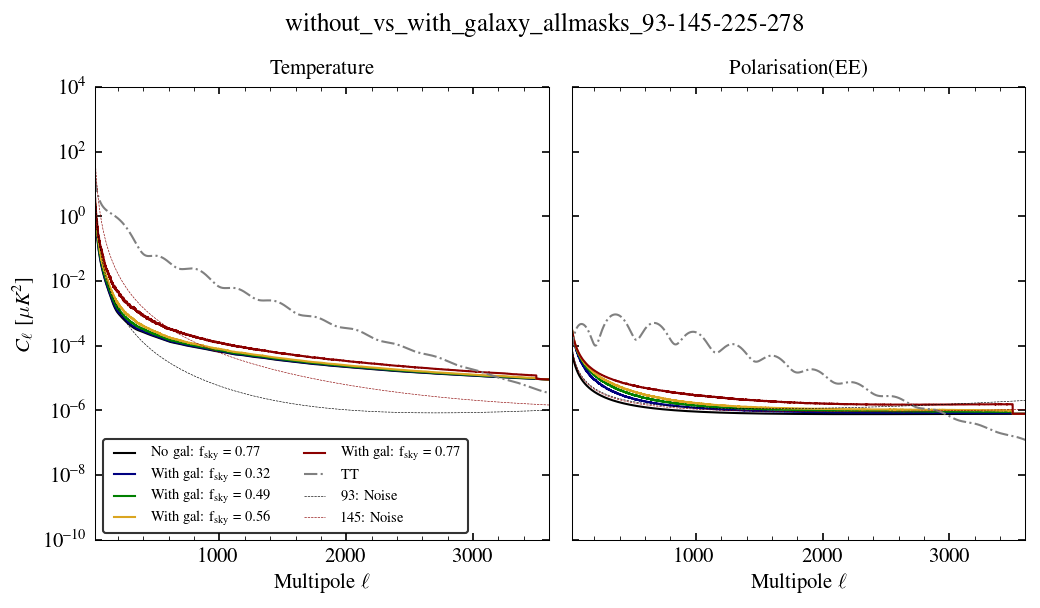

In [56]:
##### clf()
dic_for_snr = {}
logscale = 0
fig = figure(figsize=(8., 4.))
subplots_adjust(wspace=0.05)
#colorarr =['k', 'navy', 'darkgreen', 'goldenrod', 'darkred']
for fcntr, fname in enumerate( flist ):
    dic_for_snr[fname] = {}
    print(fname)
    resdic = np.load(fname, allow_pickle=1).item()
    if fname.find('galaxy0')>-1:
        lab = 'No gal'
    else:
        lab = 'With gal'
    fsky = resdic['fsky_val']
    lab = r'%s: f$_{\rm sky}=%.2f$' %(lab, fsky)
    el = resdic['el']
    for tpcntr, TP in enumerate(TParr):
        if logscale:
            ax = subplot(1,2,tpcntr+1, yscale = 'log', xscale = 'log')
        else:
            ax = subplot(1,2,tpcntr+1, yscale = 'log')#, xscale = 'log')
        cl_res = resdic['cl_residual'][TP]
        plot(el, cl_res, label = lab, color = colorarr[fcntr])
        dic_for_snr[fname][TP] = [el, cl_res, fsky]

for tpcntr, TP in enumerate(TParr):
    if logscale:
        ax = subplot(1,2,tpcntr+1, yscale = 'log', xscale = 'log')
    else:
        ax = subplot(1,2,tpcntr+1, yscale = 'log')#, xscale = 'log')
    if TP == 'T':
        tit = r'Temperature'
        plot(el_camb, cl_TT, 'gray', ls = '-.', lw = 1., label = r'TT')
    elif TP == 'P':
        tit = r'Polarisation(EE)'
        plot(el_camb, cl_EE, 'gray', ls = '-.', lw = 1., label = r'EE')
    for nucntr, nu1nu2 in enumerate( nl_dic[TP] ):
        nu1, nu2 = nu1nu2
        if nu1 != nu2: continue
        plot(nl_dic[TP][nu1nu2], ls = '--', lw = 0.3, label = r'%s: Noise' %(nu1))
    if tpcntr == 0:
        legend(loc = 3, fancybox = 1, ncol = 2, fontsize = 7)
    xlim(20, 3600); ylim(1e-10, 1e4)
    xlabel(r'Multipole $\ell$')
    if tpcntr == 0:
        ylabel(r'$C_{\ell}\ [\mu K^{2}]$')
    else:
        setp(ax.get_yticklabels(which = 'both'), visible=False)
    title(tit, fontsize = 10)
suptitle(r'%s' %(plname_str.replace('_','\_')), y = 1.)
if logscale:
    savefig('reports/galactic_sims/ILC_analysis/%s_logscale.pdf' %(plname_str))
else:
    savefig('reports/galactic_sims/ILC_analysis/%s.pdf' %(plname_str))    

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:34: RuntimeWarning: divide by zero encountered in true_divide
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  del sys.path[0]


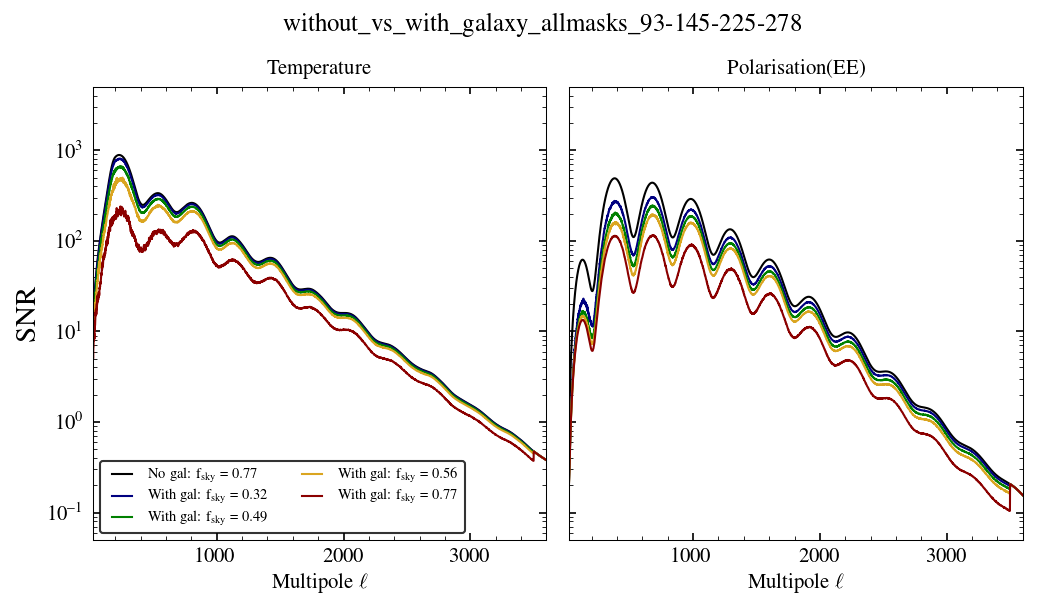

In [121]:
#now get SNR for TT and EE
dummy_delta_cl_arr = []
for snr_iter in range(1):
    logscale = 0
    fig = figure(figsize=(8., 4.))
    subplots_adjust(wspace=0.05)
    for fcntr, fname in enumerate( flist ):
    #for fcntr, fname in enumerate( [flist[0], flist[4]] ):
        for tpcntr, TP in enumerate(TParr):
            if logscale:
                ax = subplot(1,2,tpcntr+1, yscale = 'log', xscale = 'log')
            else:
                ax = subplot(1,2,tpcntr+1, yscale = 'log')#, xscale = 'log')
            el, cl_res, fsky = dic_for_snr[fname][TP]

            if fname.find('galaxy0')>-1:
                lab = 'No gal'
            else:
                lab = 'With gal'
            lab = r'%s: f$_{\rm sky}=%.2f$' %(lab, fsky)
            
            if TP == 'T':
                tit = r'Temperature'
                el_signal, cl_signal = el_camb, cl_TT
            else:
                tit = r'Polarisation(EE)'
                el_signal, cl_signal = el_camb, cl_EE
            el_noise, cl_noise = el, cl_res
            
            cl_signal_ip = np.interp(el_noise, el_signal, cl_signal)
            
            if snr_iter == 0:
                delta_cl = np.copy(cl_noise)
                snr_arr =  cl_signal_ip / delta_cl
                plot(el_noise, snr_arr, label = lab, color = colorarr[fcntr])
                ylim(5e-2, 5e3)
            else:
                delta_cl = misc.get_delta_cl(el_noise, cl_signal_ip, cl_noise, fsky = fsky)

                if tpcntr == 0: 
                    print(fname, fsky, delta_cl[10:15])
                    dummy_delta_cl_arr.append(delta_cl)

                snr_arr =  cl_signal_ip / delta_cl
                plot(el_noise, delta_cl, lw = 0.1, label = lab, color = colorarr[fcntr])
                #ylim(5e-2, 5e3)
                '''
                if fcntr == 0:
                    plot(el_noise, cl_signal_ip, label = lab, color = colorarr[fcntr])
                fill_between(el_noise, cl_signal_ip - delta_cl, cl_signal_ip + delta_cl, \
                             color = colorarr[fcntr])#, alpha = 0.1)
                ylim(1e-8, 5e3)
                '''

            if tpcntr == 0:
                legend(loc = 3, fancybox = 1, ncol = 2, fontsize = 7)
            xlim(20, 3600); 
            xlabel(r'Multipole $\ell$')
            if tpcntr == 0:
                ylabel(r'SNR', fontsize = 14)
            else:
                setp(ax.get_yticklabels(which = 'both'), visible=False)
            title(tit, fontsize = 10)
    if snr_iter == 0:
        titextrastr = r'No cosmic variance'
        plnameextrastr = 'nocosmicvariance'
    else:
        titextrastr = r'With cosmic variance'
        plnameextrastr = 'withcosmicvariance'
    suptitle(r'%s' %(plname_str.replace('_','\_')), y = 1.)
    if logscale:
        savefig('reports/galactic_sims/ILC_analysis/snr_%s_%s_logscale.pdf' %(plnameextrastr, plname_str))
    else:
        savefig('reports/galactic_sims/ILC_analysis/snr_%s_%s.pdf' %(plnameextrastr, plname_str))    

[1.73378692e+03 1.00100235e+03 7.75373084e+02 ... 3.41405220e-11
 3.41255935e-11 3.41042800e-11] [1.73378692e+03 1.00100235e+03 7.75373084e+02 ... 3.41405220e-11
 3.41255935e-11 3.41042800e-11] [1. 1. 1. ... 1. 1. 1.]


(0.001, 2.0)

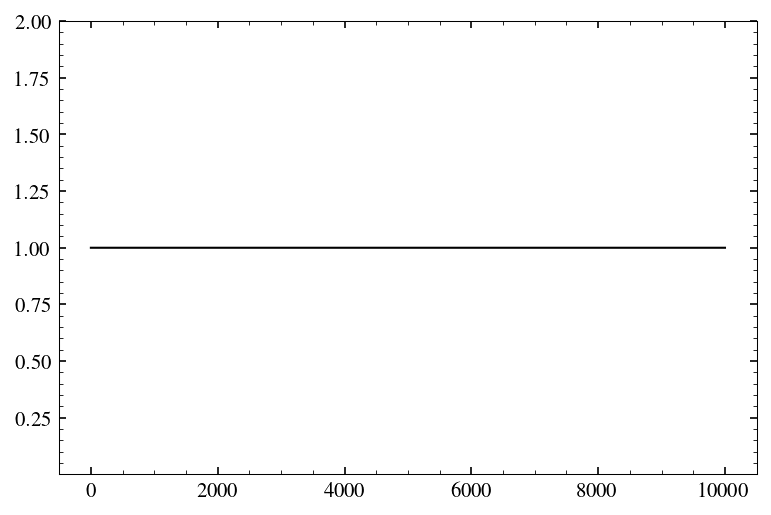

In [119]:
plot(dummy_delta_cl_arr[0]/dummy_delta_cl_arr[1])
print(dummy_delta_cl_arr[0], dummy_delta_cl_arr[1], dummy_delta_cl_arr[0]/dummy_delta_cl_arr[1])
ylim(1e-3, 2.)